In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import random
from tqdm import tqdm

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv("seealsology-data.tsv", sep='\t')

In [3]:
df.head()

,source,target,depth
0,support-vector machine,in situ adaptive tabulation,1
1,support-vector machine,kernel machines,1
2,support-vector machine,fisher kernel,1
3,support-vector machine,platt scaling,1
4,support-vector machine,polynomial kernel,1


构件图

In [10]:
# 构件图
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True)

生成随机游走序列

In [13]:
def get_randomwalk(node, path_length):
    '''
    输入起始节点和路径长度，生成随机路径
    '''
    random_walk = [node]

    for i in range(path_length - 1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))

        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
    
    return random_walk


In [7]:
all_nodes = list(G.nodes())

In [8]:
all_nodes

['support-vector machine',
 'in situ adaptive tabulation',
 'kernel machines',
 'fisher kernel',
 'platt scaling',
 'polynomial kernel',
 'predictive analytics',
 'regularization perspectives on support-vector machines',
 'relevance vector machine',
 'sequential minimal optimization',
 'space mapping',
 'winnow (algorithm)',
 'decision tree',
 'behavior tree (artificial intelligence, robotics and control)',
 'boosting (machine learning)',
 'decision cycle',
 'decision list',
 'decision matrix',
 'decision table',
 'decision tree model',
 'design rationale',
 'drakon',
 'markov chain',
 'random forest',
 'odds algorithm',
 'topological combinatorics',
 'truth table',
 'convolutional neural network',
 'attention (machine learning)',
 'convolution',
 'deep learning',
 'natural-language processing',
 'neocognitron',
 'scale-invariant feature transform',
 'time delay neural network',
 'vision processing unit',
 'applications of artificial intelligence',
 'comparison of deep learning softwar

In [14]:
get_randomwalk('random forest', 5)

['random forest',
 'boosting (meta-algorithm)',
 'margin classifier',
 'boosting (machine learning)',
 'coboosting']

生成随机游走序列

In [15]:
gamma = 10
walk_length = 5

In [16]:
random_walks = []

for n in tqdm(all_nodes):
    for i in range(gamma):
        random_walks.append(get_randomwalk(n, walk_length))

100%|██████████| 8560/8560 [00:00<00:00, 13144.20it/s]


In [17]:
len(random_walks)

85600

In [18]:
random_walks[1]

['support-vector machine',
 'winnow (algorithm)',
 'support vector machine',
 'fisher kernel',
 'fisher information metric']

训练Word2Vec模型

In [19]:
from gensim.models import Word2Vec

In [20]:
model = Word2Vec(vector_size = 256, # Embedding维度
                window = 4,   # 窗口宽度
                sg = 1,     # Skip-Gram
                hs = 0,     # 无分层SoftMax
                negative = 10,   # 负采样
                alpha = 0.03,   
                min_alpha = 0.0007,
                seed = 14
)

In [22]:
# 构建词汇表
model.build_vocab(random_walks, progress_per=2)

In [24]:
model.train(random_walks, total_examples=model.corpus_count, epochs=100, report_delay=1)

(33100989, 33111600)

分析结果

In [25]:
model.wv.get_vector('random forest').shape

(256,)

In [26]:
model.wv.get_vector('random forest')

array([-3.01849507e-02,  4.86512154e-01,  4.64332886e-02,  7.46418163e-02,
        5.06415844e-01,  5.71162999e-01, -1.79103687e-01, -5.33117175e-01,
        3.20854783e-01, -2.12304339e-01, -1.43590361e-01, -2.99373925e-01,
       -2.94844687e-01,  4.16831315e-01, -8.27870548e-01,  3.73537950e-02,
       -2.71497697e-01,  1.57990083e-01,  7.10825697e-02, -1.02511354e-01,
       -3.38429332e-01,  3.49693626e-01,  5.18570840e-01,  2.05632448e-01,
        2.97399372e-01,  1.12002504e+00,  2.82382876e-01,  1.98032614e-02,
        4.48296368e-02, -1.71045866e-03,  4.78403032e-01, -2.74890870e-01,
       -4.65925455e-01, -2.75458783e-01, -3.01034749e-01,  6.25176013e-01,
        1.73487544e-01, -9.18676853e-02,  1.41565604e-02, -3.98353547e-01,
       -6.78963901e-04,  1.93183273e-01,  6.42469674e-02, -6.14084303e-01,
       -1.15579352e-01,  1.39438868e-01, -1.76095665e-01, -1.23663262e-01,
       -5.70641637e-01,  5.17066181e-01,  7.01607317e-02,  2.24426866e-01,
        2.51800776e-01,  

In [27]:
model.wv.similar_by_word('decision tree')

[('decision matrix', 0.6639258861541748),
 ('decision list', 0.637799084186554),
 ('decision tree model', 0.5896400213241577),
 ('minimum spanning tree', 0.5864155888557434),
 ('pseudocode', 0.5808525681495667),
 ('structured programming', 0.5781484842300415),
 ('outcome measure', 0.5772010087966919),
 ('drakon', 0.5682973265647888),
 ('belief structure', 0.5589414238929749),
 ('comparison sort', 0.5586930513381958)]

PCA降维可视化

In [29]:
X = model.wv.vectors
X

array([[-0.704812  ,  0.4359264 , -0.3854737 , ...,  0.15136209,
         0.09036712, -0.29853734],
       [-0.23653933, -0.17774443, -0.3028967 , ...,  0.1163533 ,
         0.57611907,  0.12977327],
       [-0.5311538 ,  0.5159306 , -0.37831068, ...,  0.02742469,
        -0.33218285, -0.11929614],
       ...,
       [-0.13418336,  0.05478708, -0.34122506, ..., -0.13667426,
        -0.2940341 ,  0.63086855],
       [-0.2723978 ,  0.3407938 , -0.34218186, ...,  0.17868884,
        -0.7391839 ,  0.6666307 ],
       [-0.22703142, -0.19530918, -0.33794233, ..., -0.0807901 ,
        -0.29622343,  0.06618063]], dtype=float32)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
embed_2d = pca.fit_transform(X)

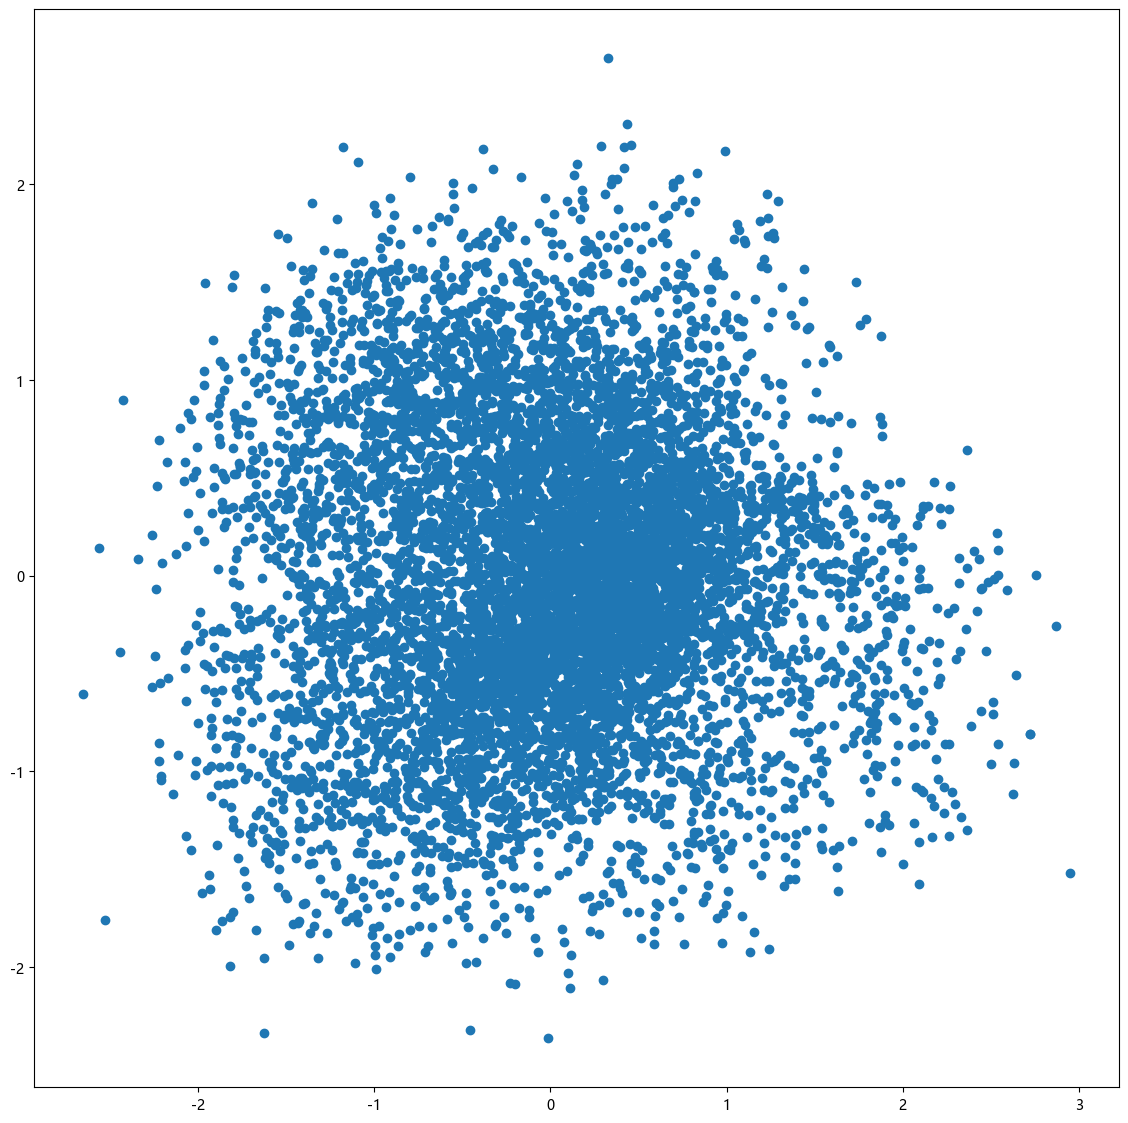

In [32]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

可视化某个词条的二维Embedding

In [33]:
term = 'computer vision'
term_256d = model.wv[term].reshape(1, -1)

In [35]:
term_256d.shape

(1, 256)

In [37]:
term_2d = pca.transform(term_256d)

In [38]:
term_2d

array([[-0.2133696 ,  0.53308386]], dtype=float32)

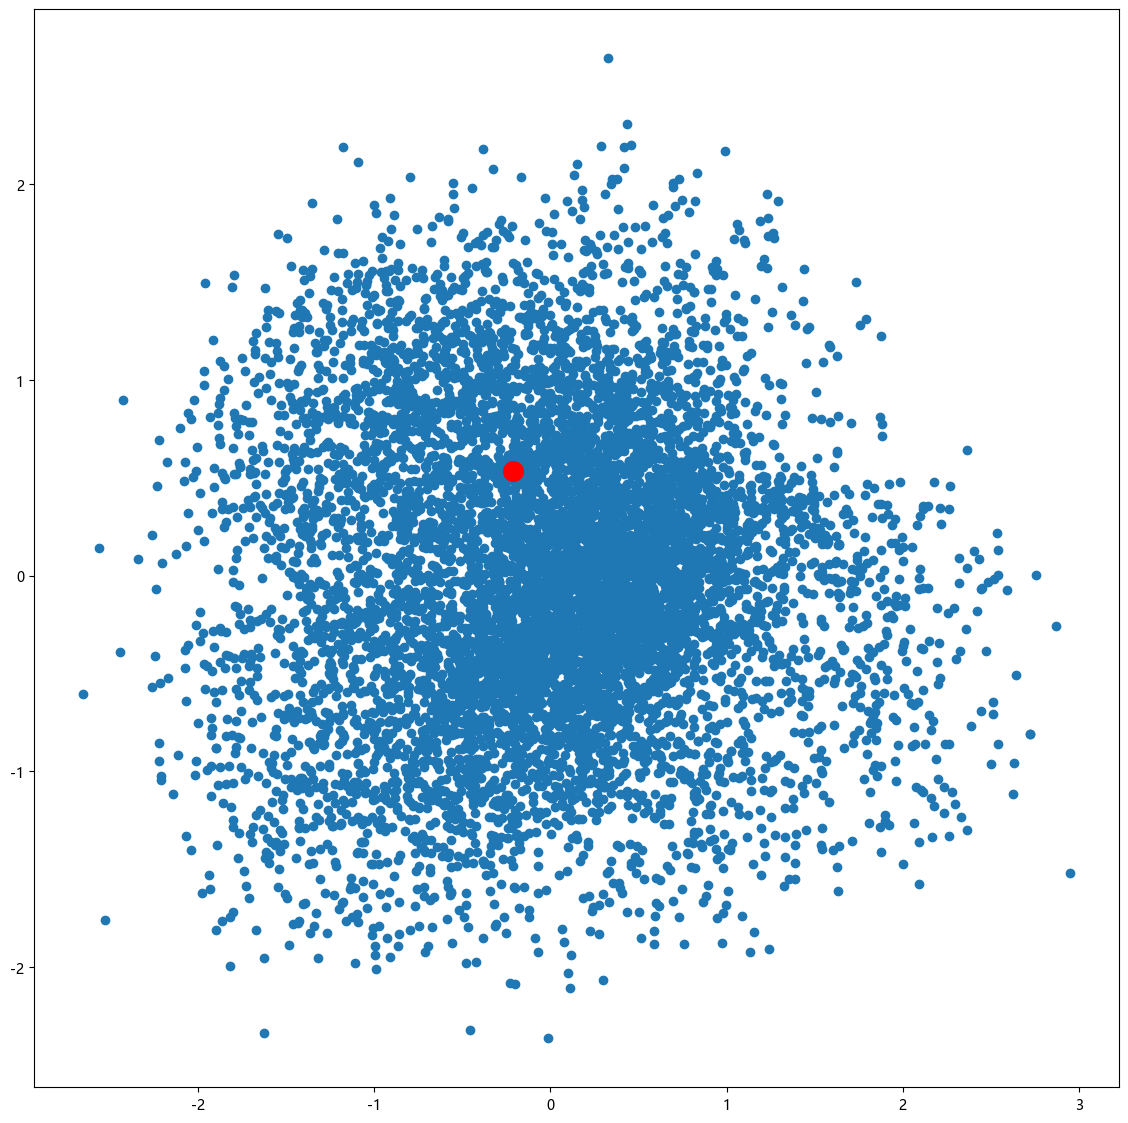

In [39]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.scatter(term_2d[:, 0], term_2d[:, 1], c='r', s=200)
plt.show()

In [41]:
pagerank = nx.pagerank(G)
pagerank

{'support-vector machine': 0.0002886997759998745,
 'in situ adaptive tabulation': 0.00018457981997001206,
 'kernel machines': 0.0001727460192460222,
 'fisher kernel': 9.145942067928083e-05,
 'platt scaling': 8.345428540605453e-05,
 'polynomial kernel': 8.918986665044396e-05,
 'predictive analytics': 0.0006501684155729331,
 'regularization perspectives on support-vector machines': 6.098681170817919e-05,
 'relevance vector machine': 0.00010565819864358853,
 'sequential minimal optimization': 9.992447621021913e-05,
 'space mapping': 0.0007274694924840454,
 'winnow (algorithm)': 6.098681170817919e-05,
 'decision tree': 0.0005060017217475599,
 'behavior tree (artificial intelligence, robotics and control)': 9.331625851589204e-05,
 'boosting (machine learning)': 0.00041891596086775863,
 'decision cycle': 0.00029390851400953454,
 'decision list': 9.823618941920352e-05,
 'decision matrix': 0.00013864039347309228,
 'decision table': 0.0002798140164713883,
 'decision tree model': 0.0002130187713

In [42]:
node_importance = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

In [45]:
n = 30
terms_chosen = []

for each in node_importance[:n]:
    terms_chosen.append(each[0])

terms_chosen.extend(['computer vision','deep learning','convolutional neural network','convolution','natural-language processing','attention (machine learning)','support-vector machine','decision tree','random forest','computational imaging','machine vision','cognitive science','neuroscience','psychophysics','brain','visual cortex','visual neuroscience','cognitive model','finite difference','finite difference time domain','finite difference coefficients','finite difference methods for option pricing','iso 128','iso 10303'])

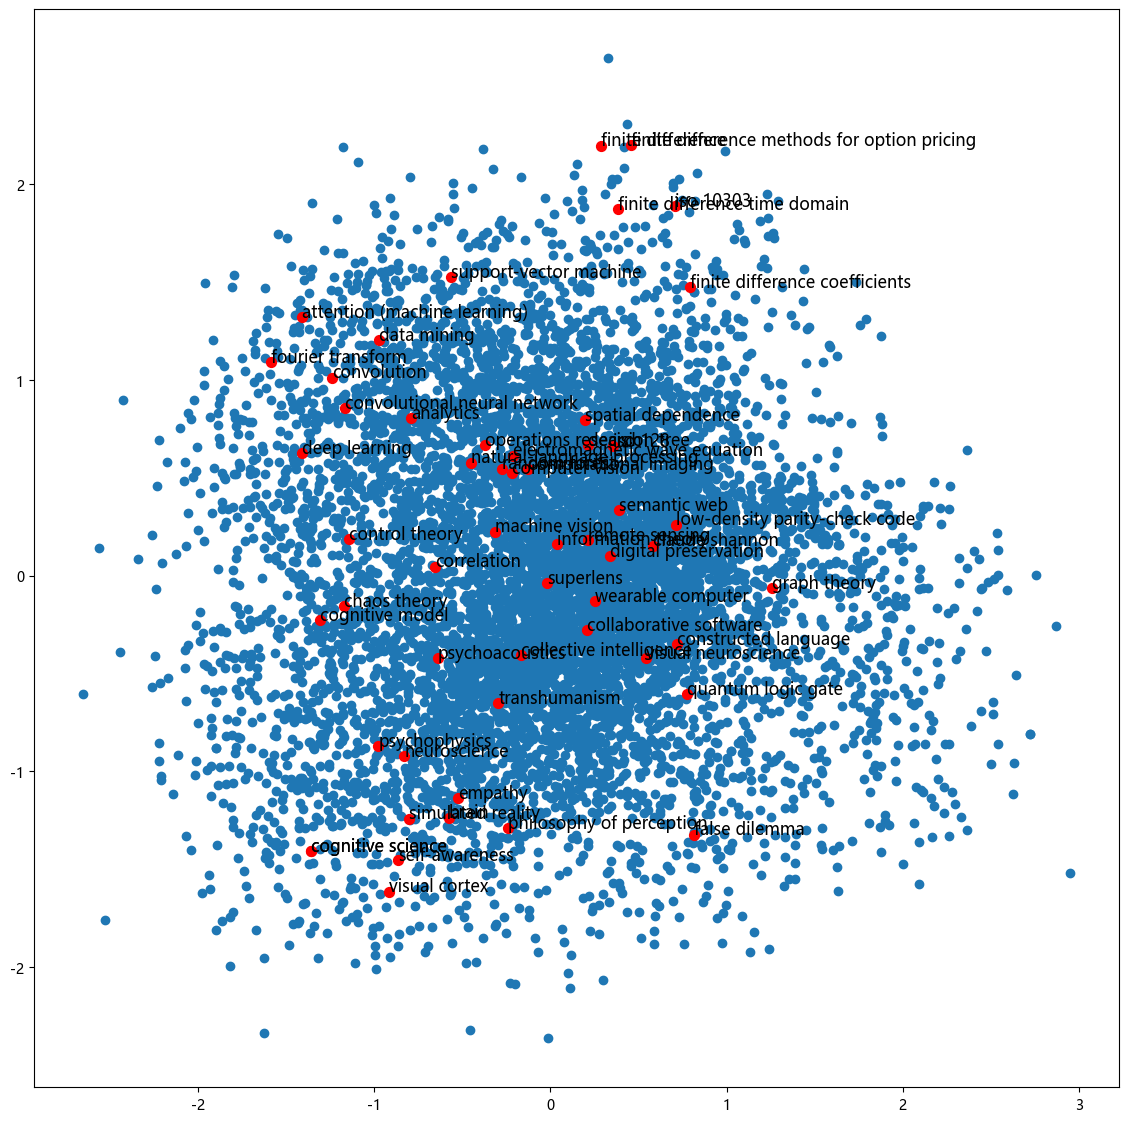

In [47]:
term2index = model.wv.key_to_index

plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()

TSNE降维

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

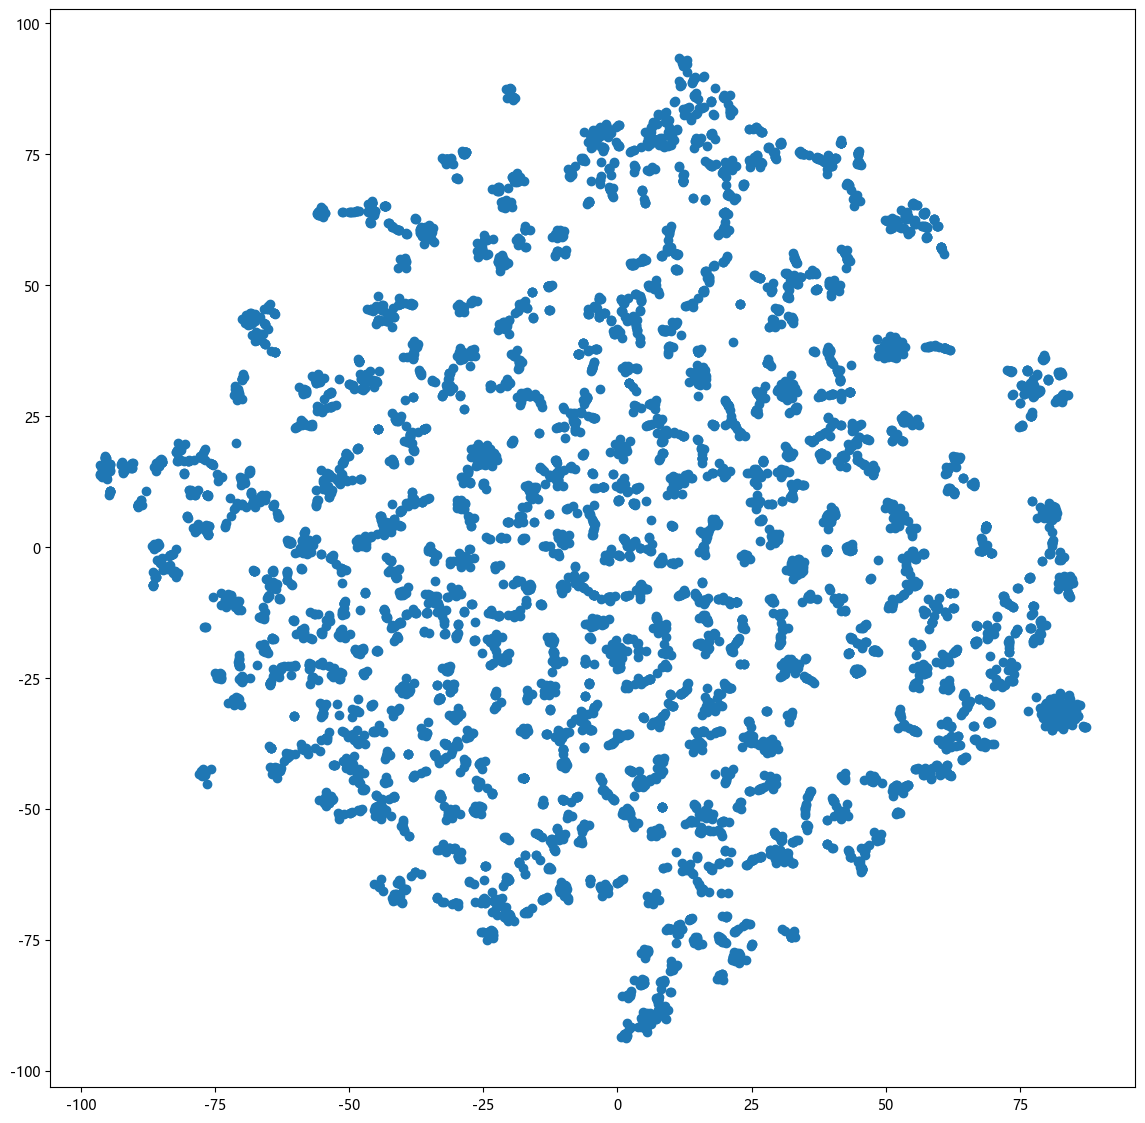

In [49]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

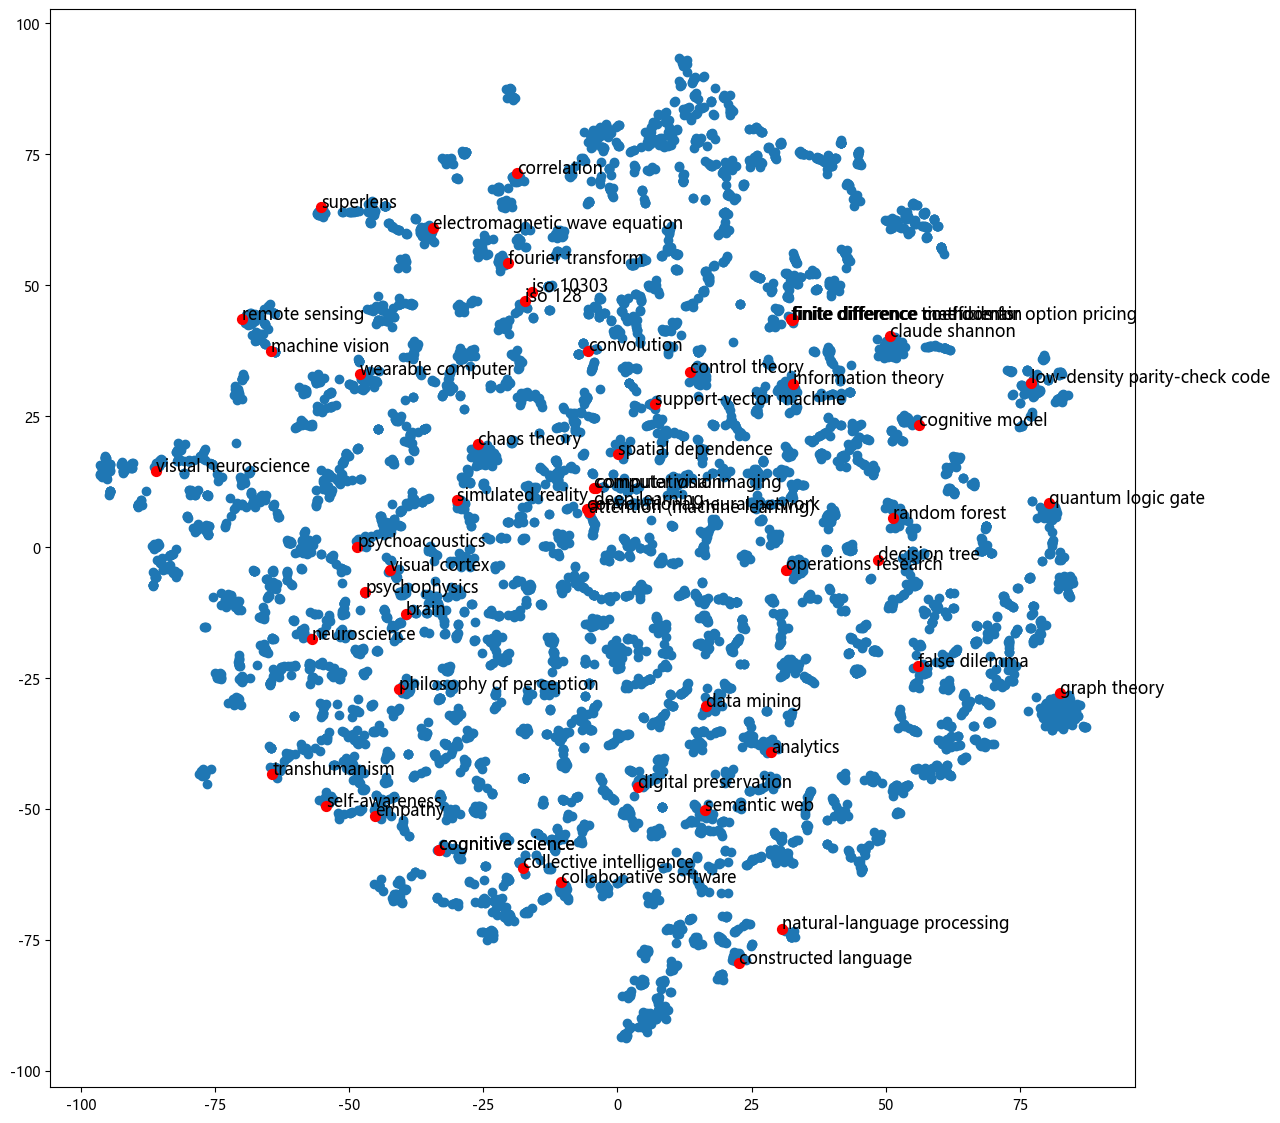

In [50]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    plt.scatter(embed_2d[idx,0], embed_2d[idx,1],c='r',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
plt.show()